# Includes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [3]:
title_size = 24
axislabel_size = 24
axistick_size = 20
legendlabel_size = 16

# Surface area-to-volume plot

### Constants

In [4]:
pi = 3.14159
um = 1e-6            # micrometer
nm = 1e-9            # nanometer

lam = 1*nm           # Debye length

### Calculate

In [5]:
rs = [1*nm, 3*nm, 10*nm, 30*nm, 100*nm, 300*nm, 1000*nm, 3000*nm]
ratios = [(r**2-(r-lam)**2)/(r**2) for r in rs]

### Plot

/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


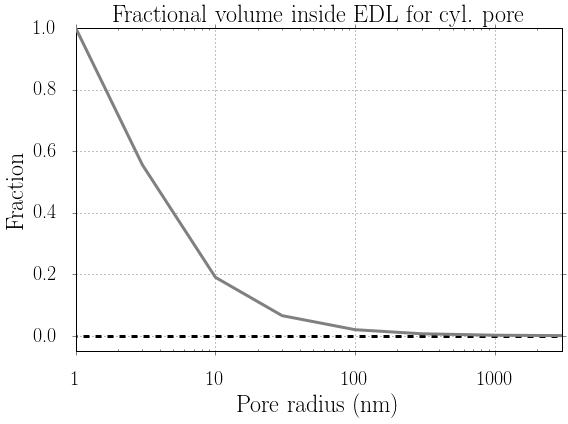

In [6]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(rs, ratios, lw = 3, c = 'gray', zorder = 3)
plt.semilogx([.1*nm,1], [0,0], lw = 3, c = 'black', ls = '--', zorder = 2)

plt.xlim(min(rs), max(rs))
plt.ylim(-0.05, 1.0)


plt.title('Fractional volume inside EDL for cyl. pore', size = title_size)
plt.xlabel('Pore radius (nm)', size = axislabel_size)
plt.ylabel('Fraction', size = axislabel_size)

ax = plt.gca()
ax.set_xticklabels(['', '1', '10', '100', '1000'])
ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.grid()

#plt.savefig('fractional_volume.png', dpi = 300)

plt.show()

# Debye length plot

### Constants

In [71]:
nm = 10**(-9.)                                                     # nanometer
z = 1                                                             # Valency
z = 2
e = 1.6*10**(-19.)                                                 # Elementary charge
N = 6.02*10**23.                                                   # Avogadro's number
epsilon_0 = 8.85*10**(-12.)                                        # Permittivity free space
epsilon_r = 80                                                     #      ""      water
T = 273.15                                                         # Room temp
k_B = 1.38*10**(-23.)                                              # Boltzmann constant
C0s = np.array([1, 3, 10, 30, 100, 300, 1000])*N                   # Bulk concentrations

### Calculate

In [72]:
kappas = np.array([((2*z_1**2*e**2*C0)/(epsilon_0*epsilon_r*k_B*T))**.5 for C0 in C0s])
debye_lengths = np.array([1./kappa for kappa in kappas])/nm

### Plot

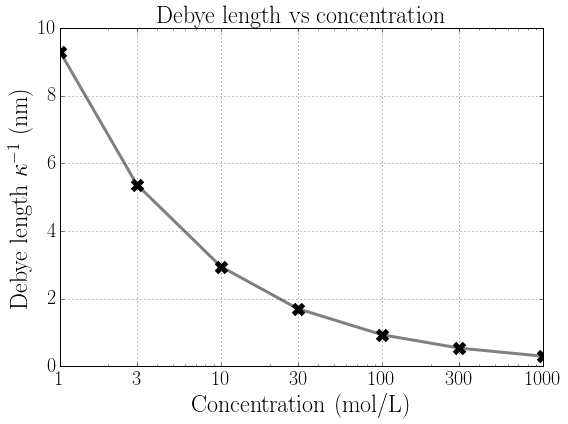

In [76]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(C0s/N, debye_lengths_1, 'kx', ms = 10, mew = 5, mec = 'black', color = 'gray', lw = 3, ls = '-')



plt.title('Debye length vs concentration', size = title_size)
plt.xlabel('Concentration (mol/L)', size = axislabel_size)
plt.ylabel('Debye length $\kappa^{-1}$ (nm)', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

ax = plt.gca()

plt.xticks([1, 3, 10, 30, 100, 300, 1000], ['1', '3', '10', '30', '100', '300', '1000'])

plt.savefig('debye_length.png', dpi = 600)

plt.show()